
# Project: No-show medical appointment prediction¶

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
##  Introduction

Information from 100k medical appointments provided by the Brazil's health care system has  been collected to analyse  the dataset and predict a no-show for the scheduled appointments.The variables provided will be used to dig deeper to understand the factors that influence the 'no-show' for the scheduled appointments.

 14 attributes captured in the dataset are self explanatory.Some of the variables with supplemental info:

  - ScheduledDay’ tells us the date the patient set up their appointment.
  - Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
  - No Show'  ‘No’ if the patient showed up for their appointment, and ‘Yes’ if they did not show up.
  - Neighbourhood is the appointment venue.

### Questions

Few of the questions that can be explored to gain insight to predict 'no-show' for the scheduled appointments-

 1. Does the difference in days between appointment scheduled date and appointment date affect the show/no_show?
 2. Do patients who recieved sms for their appointments have better show rate?
 3. Do individuals with prior issue(hypertension,diabetes,alcoholism or handcap) are more regular for their appointments?
 4. Does the age along with a prior issue affect the no-show?Which age group is more likely to turn up for their appointment?
 5. Role of scholarship on the no-show status.



In [1]:
#Import the required packages to load and process data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from datetime import datetime as dt
from matplotlib import style

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# Load data and print out a few lines using head method. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

dataset_df=pd.read_csv('noshowappointments.csv')
dataset_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
#Use info function to view the row and column count, presence of missing values and data types of the attributes
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


#### Observations
1. There are no null values.
2. Typo in column names.
3. ScheduledDay and AppointmentDay columns are in string object format, needs to to be converted to date time object

In [4]:
#Use shape function to view the row and column count respectively
dataset_df.shape

(110527, 14)

In [5]:
#View the columns
dataset_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
#check for duplicate rows  :- no duplicates if output returns 0
sum(dataset_df.duplicated())

0

In [7]:
#Summary statistics
dataset_df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


1. Couple of points to note, the minimum and maximum age shows extremes.
2. Handcap column has a maximum value of 4(at first look doesnt seem to influence our analysis).
3. Besides the first two columns, the remaing columns have values 0 and 1

###  Data Cleaning 

In [10]:
#Rename /rectify  column names  to add clarity 
dataset_df.rename(columns={'Hipertension':'Hypertension','Handcap':'Handicap','No-show':'No_show_status'},inplace=True)
dataset_df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show_status'],
      dtype='object')

In [11]:
##Check the unique values in the columns and note the observations.
print (sorted(dataset_df['Age'].unique()))

[-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]


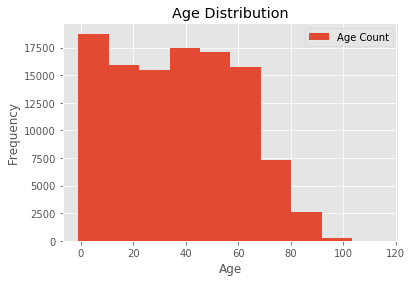

In [12]:
#Visualize the age distribution
style.use('ggplot')
dataset_df['Age'].hist(label='Age Count');
plt.xlabel('Age');
plt.ylabel('Frequency')
plt.title('Age Distribution');
plt.legend();

In [13]:
col_unq_chk=['Gender','SMS_received','Hypertension','Handicap','Diabetes','Alcoholism','No_show_status']
for col in col_unq_chk:
    print ('{}:'.format(col), dataset_df[col].unique())

Gender: ['F' 'M']
SMS_received: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Diabetes: [0 1]
Alcoholism: [0 1]
No_show_status: ['No' 'Yes']


### Observations
There are three outliers:-1,0,115
Ages: 0 and -1 are unlikely where as 115 is probable, for data processing sake this value will not be considered.

More individuals in the age group(1-10) : True


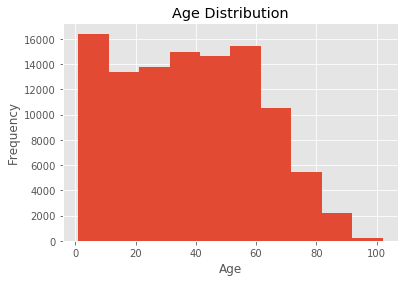

In [14]:
#Remove the outliers
dataset=dataset_df.query('(Age >0) & (Age<115)')
dataset['Age'].hist();
plt.xlabel('Age');
plt.ylabel('Frequency')
plt.title('Age Distribution');

d1=dataset.query('Age > 0 & Age <= 10').Age.value_counts().sum()
d2=dataset.query('Age > 10 & Age <= 20').Age.value_counts().sum()
print('More individuals in the age group(1-10) :',d1>d2)

Age distribution of the patients has the highest concentration in the group(1-10),ie. there are more individuals in that particular age group.

In [15]:
#Note-Suppresses warning
import warnings
warnings.filterwarnings("ignore")

#ScheduledDay and AppointmentDay columns are in string objects, convert to date time object
dataset['ScheduledDay']=pd.to_datetime(dataset['ScheduledDay'])
dataset['AppointmentDay']=pd.to_datetime(dataset['AppointmentDay'])

In [16]:
#AppointmentDay column has no time component.For ease of comparison, 
#have considered the date part only in ScheduledDay column
dataset['ScheduledDay']=dataset['ScheduledDay'].dt.strftime('%Y-%m-%d')
dataset['ScheduledDay']=pd.to_datetime(dataset['ScheduledDay'])

In [17]:
#find the timedelta and extract the numeric part.
dataset['WaitTime']=(dataset['AppointmentDay']-dataset['ScheduledDay']).astype('timedelta64[D]')

In [18]:
dataset.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show_status,WaitTime
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0.0
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0.0


<a id='eda'></a>
## Exploratory Data Analysis

### 1. Does the difference in days between appointment scheduled date and appointment date affect the show/no_show?

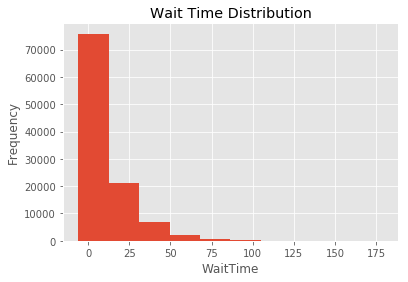

In [19]:
style.use('ggplot')
dataset['WaitTime'].plot(kind='hist',title='Wait Time Distribution');
plt.xlabel('WaitTime');

In [20]:
print(sorted(dataset.WaitTime.unique()))

[-6.0, -1.0, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 101.0, 102.0, 103.0, 104.0, 105.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 115.0, 117.0, 119.0, 122.0, 123.0, 125.0, 126.0, 127.0, 132.0, 133.0, 139.0, 142.0, 146.0, 151.0, 155.0, 162.0, 169.0, 176.0, 179.0]


Presence of outliers:-6.0,-1.0 to be removed.

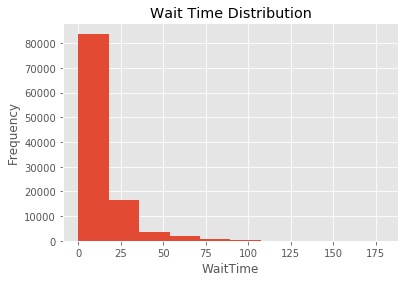

In [21]:
#Wait Time without outliers
dataset=dataset.query('WaitTime>=0')
dataset['WaitTime'].plot(kind='hist',title='Wait Time Distribution');
plt.xlabel('WaitTime');

No_show_status
No      8.737823
Yes    15.793559
Name: WaitTime, dtype: float64


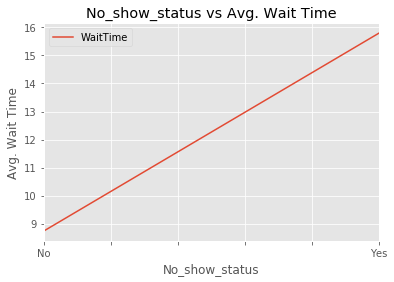

In [22]:
print(dataset.groupby('No_show_status')['WaitTime'].mean())
dataset.groupby('No_show_status')['WaitTime'].mean().plot(kind='line',title='No_show_status vs Avg. Wait Time')
plt.ylabel('Avg. Wait Time')
plt.legend();

The right skewed distribution shows that there is a higher concentration of  smaller wait time, about less than 12 days.Smaller wait times enables the patients to make it to their appointments.This is reflected in the linear relationship between show up status and wait time.With increase in wait time, the likelihood of patients not making it to their appointments increases.
Below plot incorporates the impact on gender.At a shorter wait time, we see women have better chances of show-up  than men for their appointments' and again women take the lead in not showing up for their appointments at a higher average wait time. 

                        WaitTime
No_show_status Gender           
No             F        9.094500
               M        8.061838
Yes            F       16.024038
               M       15.349318


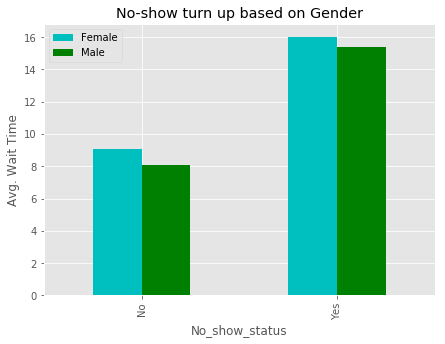

In [23]:
wait_time_gender=dataset.groupby(['No_show_status','Gender'])[['WaitTime']].mean()
print(wait_time_gender)

fig, ax = plt.subplots(figsize=(7,5))
wait_time_gender.unstack().plot(kind='bar',ax=ax,color=['c','g'],title='No-show turn up based on Gender');
plt.ylabel('Avg. Wait Time');
plt.legend(['Female','Male']);

###  2. Do patients who recieved sms for their appointments have better no-show rate?

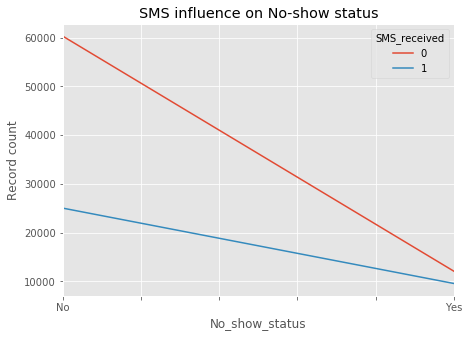

In [24]:
fig, ax = plt.subplots(figsize=(7,5))
dataset.groupby(['No_show_status','SMS_received']).count()['Age'].unstack().plot(title='SMS influence on No-show status',ax=ax);
plt.ylabel('Record count');
#plt.legend(['Without SMS','With SMS']);

We see that majority of patients who made it to the appointment did not recieve the sms in comparison to those who recieved the sms.There are patients who did recieve the sms but failed to turn up for their appointment.Exploring this in terms of proportions:

In [25]:
#computing the propotions
status_count=dataset.groupby(['No_show_status']).count()['Age']
sms_status_count=dataset.groupby(['No_show_status','SMS_received']).count()['Age']
status_count,sms_status_count

(No_show_status
 No     85305
 Yes    21672
 Name: Age, dtype: int64, No_show_status  SMS_received
 No              0               60289
                 1               25016
 Yes             0               12104
                 1                9568
 Name: Age, dtype: int64)

In [26]:
noShow_prop=sms_status_count['No']/status_count['No']
noShow_yes_prop=sms_status_count['Yes']/status_count['Yes']
noShow_prop,noShow_yes_prop

(SMS_received
 0    0.706746
 1    0.293254
 Name: Age, dtype: float64, SMS_received
 0    0.558509
 1    0.441491
 Name: Age, dtype: float64)

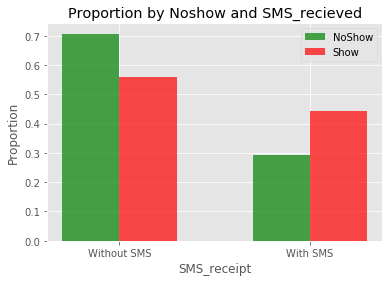

In [27]:
ind = np.arange(len(noShow_prop))  # the x locations for the groups
width = 0.3  
noshow_bars = plt.bar(ind, noShow_prop, width, color='g', alpha=.7, label='NoShow')
show_bars = plt.bar(ind + width, noShow_yes_prop, width, color='r', alpha=.7, label='Show')

plt.ylabel('Proportion')
plt.xlabel('SMS_receipt')
plt.title('Proportion by Noshow and SMS_recieved')
locations = ind + width / 2  # xtick locations
labels = ['Without SMS', 'With SMS']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend();


Higher proportion of patients who made it to the appointment did not recieve the sms while compared to those who did recieve the sms.SMS receipt is not  sufficient enough criteria for patient's attendence on their appointment date.From this we can safely say that sms alone is not the driving /influencing factor for patients to go to the appointment.

Therefore, the likelihood of patients at their appointment is not correlated to sms receipt(alone) and neither the 'non receipt' of sms, can cause the patient to miss the appointment.

Consider an additional factor of WaitTime.In below graph we see that,patients with longer wait time and with sms receipt did turn up for their appointment while patients with very short wait time and no sms receipt also did not miss the appointment.If we look back,we see that for plots between No_show status and SMS receipt, more patients who went to their appoinments did not recieve the sms.However with introduction of wait time as an additional parameter we see a contradictory behavior which is,more patients who went to their appoinments did recieve the sms,reflecting a case of Simpson's paradox. 

The avg. wait time in such a case has also shot to 18.53 days which is very high when compared to the question posed in point 1 with 8.73 days.avg. wait time for patients who make it to the appointments'. Does that mean sms influences the turn up status and patients are willing to wait greater number of days just because of sms receipt?

                              WaitTime
No_show_status SMS_received           
No             0              4.673771
               1             18.532259
Yes            0             12.512640
               1             19.944084


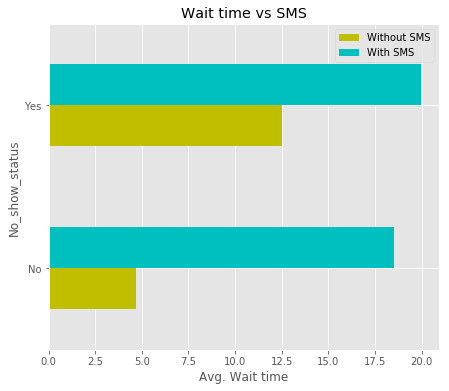

In [28]:
print(dataset.groupby(['No_show_status','SMS_received'])[['WaitTime']].mean())
dataset.groupby(['No_show_status','SMS_received'])[['WaitTime']].mean().unstack().plot(kind='barh',figsize=(7,6),title='Wait time vs SMS',color=['y','c']);
plt.xlabel('Avg. Wait time');
plt.legend( ['Without SMS', 'With SMS']); 

### 3. Do individuals with prior issue(hypertension,diabetes,alcoholism or handcap) more likely to not miss appointments?


In [29]:
prior_issue_dataset=dataset.groupby('No_show_status')[['Hypertension','Alcoholism','Diabetes','Handicap']].mean()
prior_issue_dataset

,Hypertension,Alcoholism,Diabetes,Handicap
No_show_status,,,,
No,0.211336,0.031452,0.076350,0.023492
Yes,0.174049,0.031238,0.065984,0.020672


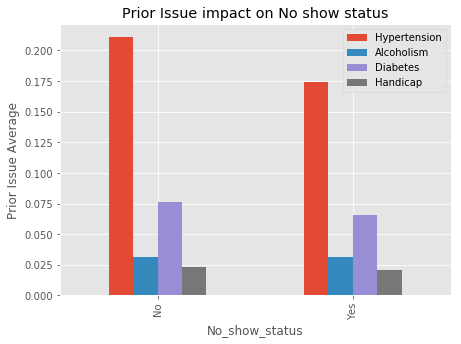

In [30]:
prior_issue_dataset.plot(kind='bar', title='Prior Issue impact on No show status',figsize=(7,5));
plt.ylabel('Prior Issue Average')

We see there is a concentration of patients with hypertension when compared to those with other health issues captured in the dataset.Considerable number of such patients with hypertension are more likely to go to their appointments.Patients with other health issues and with 'No_show' status also outnumber their counterparts who donot go to their health check.

All in all, patients with noted prior isssue(s)  are more likely to go to their appointment.

With reference to below graph with focus on patients with/with out hypertension,majority(blue bar) of patients donot have hypertension and they make it to their appointments'.Comparing the green bars, patients with hypertension and with No-show status as 'No' outnumber their counterpart who miss their appointment. 
Since patients with other health issues are very small in number, we can say that majority donot have any of these health issues and these make it to the appointment.

Answer to our question:Patients with prior issue are more likely to go to their appointment.

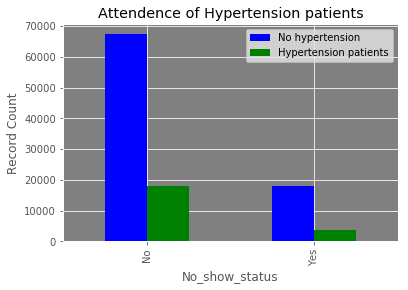

In [31]:
prior_issue_age_dataset=dataset.groupby(['No_show_status','Hypertension'])[['Age']].count()
prior_issue_age_dataset.unstack().plot(kind='bar',color=['b','g']).set_facecolor('grey')
plt.ylabel('Record Count')
plt.title('Attendence of Hypertension patients');
plt.legend(['No hypertension','Hypertension patients']);

Would these hypertension patients be impacted by waittime?

No_show_status  Hypertension
No              0                8.797256
                1                8.516031
Yes             0               15.941620
                1               15.090933
Name: WaitTime, dtype: float64


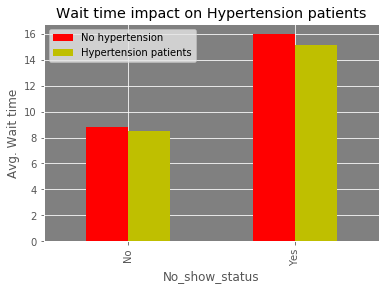

In [32]:
print(dataset.groupby(['No_show_status','Hypertension']).mean()['WaitTime'])
dataset.groupby(['No_show_status','Hypertension']).mean()['WaitTime'].unstack().plot(kind='bar',color=['r','y'],title='Wait time impact on Hypertension patients').set_facecolor('grey')
plt.ylabel('Avg. Wait time');
plt.legend(['No hypertension','Hypertension patients'])

We see that hypertension patients would be regular to their appointment if they had a shorter wait time.Shorter wait time seems to influence the patients with or with out hypertension to show up for their appointment.Subsequent question that would arise is - what is the optimal wait time to enable the patients to turn up for their appointment?

### 4. Does the age along with a prior issue affect the no-show?Which age group is more likely to turn up for their appointment?

Probling the question 3 further, we analyse the relation between age and hypertension.In below graph we see that, hypertension is observed in the patients from age 20 onwards and increases linearly till late 80's.

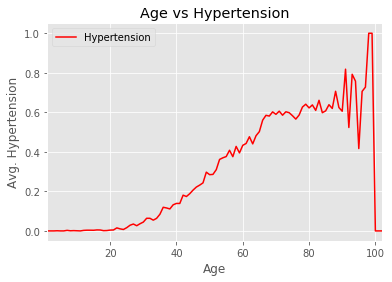

In [33]:
dataset.groupby(['Age']).mean()['Hypertension'].plot(color=['r'],kind='line', title='Age vs Hypertension')
plt.ylabel('Avg. Hypertension');
plt.legend();

In [37]:
x=dataset.groupby(['Age']).mean()['Hypertension']
x.plot('Hypertension','Age',kind='scatter')

TypeError: __call__() got multiple values for argument 'kind'

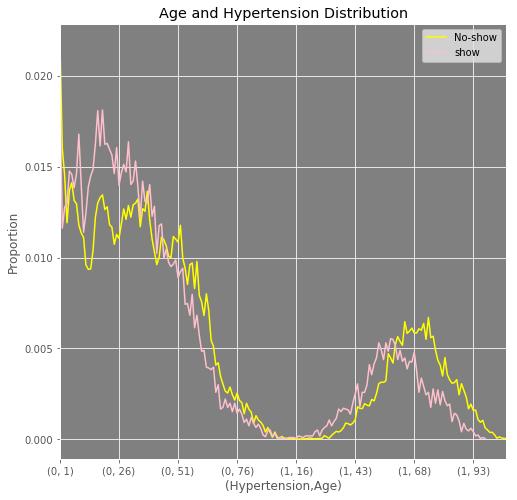

In [34]:
#Compute the proportions
status_tot=dataset.groupby('No_show_status').count()['Age']
age_Noshowup=dataset.groupby(['No_show_status','Hypertension','Age']).count()['Gender']
prop_no=age_Noshowup['No']/status_tot['No']
prop_yes=age_Noshowup['Yes']/status_tot['Yes']

prop_no.plot(color='yellow',figsize=(8,8)).set_facecolor('grey')
prop_yes.plot(color='pink',figsize=(8,8)).set_facecolor('grey')

plt.xlabel('(Hypertension,Age)')
plt.title('Age and Hypertension Distribution')
plt.ylabel('Proportion');
plt.legend(['No-show','show']);

Probability of patients with hypertension who go to their appointment increases starting around age 20(yellow line for No_show) till late 60's ,drops a tiny fraction and raises in early 70's and then to decline gradually.Proportion of patients who are more likely to go are in age group of late 60's to mid 90's compared to the ones who have hypertension and do not go to appointments.Factors on why these individuals cannot make it could be varied-wait time,venue distance,financial situations, other major health issues,etc.

### 5. Role of scholarship  on no-show status.

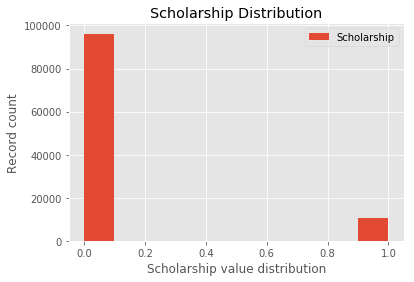

In [108]:
dataset.Scholarship.hist(label='Scholarship');
dataset.Scholarship.value_counts()
plt.xlabel('Scholarship value distribution')
plt.ylabel('Record count')
plt.title('Scholarship Distribution')
plt.legend();

Majority of patients donot have access to scholarship, how would this impact?

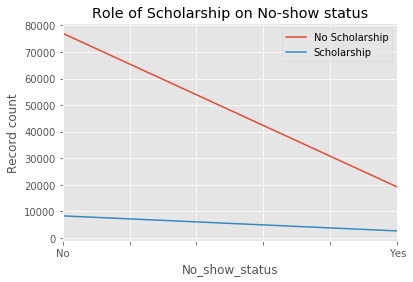

In [111]:
dataset.groupby(['No_show_status','Scholarship']).count()['Age'].unstack().plot(title='Role of Scholarship on No-show status')
plt.ylabel('Record count');
plt.legend(['No Scholarship','Scholarship']);

Scholarship doesn't impact the No-show status.Majority of patients without scholarship do not miss their appointment.

<a id='conclusions'></a>
## Conclusions - Predicting whether a patient makes it to the appointment



**Limitations with regards to the analysis and conclusion  - Inferential statistics and Machine learning has not been applied.The entire analysis involves usage of Numpy, Pandas and Matplotlib packages **

The data analysis of the 'No_show appointment status'  dataset involves the analysis of the following attributes:
Gender, ScheduledDay,AppointmentDay, Age,Scholarship, Hypertension,Diabetes, Alcoholism, 'Handicap, SMS_received, and 'No_show_status' along with the new attribute,WaitTime. The analysis done for the questions posed is an attempt to understand how the appointments are influenced by these varied factors considered.Summarizing the questions with tentative findings -

 1. Does the difference in days between appointment scheduled date and appointment date affect the show/no_show?
    
    The wait time calculated between  appointment scheduled date and appointment date has a linear relationship 
    with show up status.Patients who have shorter wait time of 8.73 make it to the appointment while those fail 
    have average wait time of 15.78 days.
    
 2. Do patients who recieved sms for their appointments have better no-show rate? 
 
    SMS doesnot impact the show up rate.  
    
 3. Do individuals with prior issue(hypertension,diabetes,alcoholism or handcap) are more regular for their 
    appointments?
 
     Patients with prior issue are more likely to make it to the appointment and all those who made it had bettwe 
     wait time.
     
 4. Does the age along with a prior issue affect the no-show?Which age group is more likely to turn up for their 
     appointment?
     
     Proportion of hypertension patients who are more likely to go are in age group of late 60's to mid 90 
     compared to the ones who have hypertension and do not go to appointments.
  
 5. Role of scholarship affecting the no-show status.
 
    Scholarship  does not impact the no-show status.
 
     ** Inference: From the above, observe that wait time has an influence on the patients to make it to their 
     appointments;Shorter the wait time, better turn up rate. **
 
 









####  Read me note -
Following sites have been referenced -

    http://pandas.pydata.org
    https://stackoverflow.com
    https://www.kaggle.com

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])